In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [0]:
df = pd.read_csv('Data/jena_climate_2016.csv')


In [0]:
data = df.drop(['Date Time'], axis = 1)
data.index = df['Date Time']
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2016 00:00:00,999.08,-0.01,273.22,-0.44,96.9,6.10,5.91,0.19,3.69,5.92,1271.32,1.16,2.04,192.4
01.01.2016 00:10:00,999.03,0.01,273.25,-0.41,97.0,6.11,5.93,0.18,3.70,5.94,1271.16,1.01,2.12,211.6
01.01.2016 00:20:00,999.07,0.06,273.29,-0.36,97.0,6.13,5.95,0.18,3.71,5.96,1270.97,0.80,1.52,203.8
01.01.2016 00:30:00,999.09,0.07,273.30,-0.36,96.9,6.14,5.95,0.19,3.71,5.96,1270.93,0.77,1.64,184.2
01.01.2016 00:40:00,999.09,-0.05,273.18,-0.50,96.8,6.09,5.89,0.19,3.68,5.90,1271.54,0.84,1.92,200.1


In [0]:
split_size = int(0.8*len(data))
train = data[:split_size]
valid = data[split_size:]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f44dd171a20>,
      dtype=object)

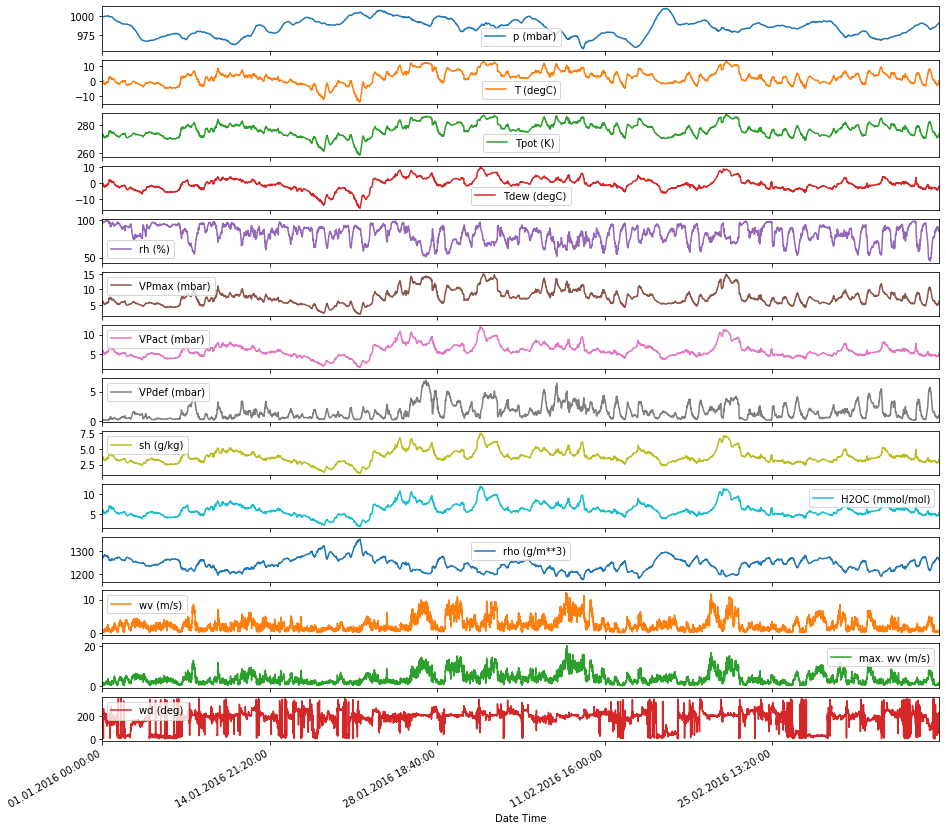

In [0]:
data[:10000].plot(subplots=True, figsize=(15,15))

In [0]:
model = VAR(endog=train)
model_fit = model.fit(maxlags=15)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
prediction = model_fit.forecast(model_fit.y,steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [0]:
model_fit.fittedvalues.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2016 02:30:00,999.171737,-0.778276,272.447633,-1.172826,96.877082,5.727410,5.614310,0.112532,3.500271,5.618309,1275.140243,0.694761,1.123194,191.972544
01.01.2016 02:40:00,999.284462,-1.382924,271.833173,-1.770144,96.971137,5.530110,5.368844,0.161178,3.345372,5.370298,1278.249272,0.505674,0.880962,182.620201
01.01.2016 02:50:00,999.376966,-1.714320,271.493754,-2.100367,96.970256,5.390501,5.246359,0.143578,3.268728,5.247453,1280.024572,0.538372,0.867566,181.998868
01.01.2016 03:00:00,999.507700,-1.856289,271.340840,-2.206067,97.234948,5.286202,5.195112,0.090754,3.237943,5.197332,1280.854974,0.356870,0.649490,168.464281
01.01.2016 03:10:00,999.527647,-1.966061,271.229420,-2.325229,97.193524,5.264391,5.146848,0.118478,3.206628,5.147614,1281.434209,0.440026,0.740294,182.306873


In [0]:
df_forecast = pd.DataFrame(prediction, index=df.index[split_size:], columns=data.columns)
df_forecast.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
410099,996.998154,6.011190,279.412637,5.787065,98.599042,9.359791,9.229925,0.128810,5.781087,9.262343,1239.753751,0.621144,1.420251,157.009678
410100,997.004669,6.207527,279.607963,5.842271,97.845139,9.520125,9.273292,0.246088,5.808352,9.305649,1238.901910,0.680257,1.540297,160.984140
410101,997.014941,6.325892,279.725624,5.827143,97.137374,9.612921,9.270317,0.342620,5.805788,9.302215,1238.403074,0.761243,1.575996,163.244197
410102,997.007862,6.466986,279.867728,5.854907,96.477305,9.710518,9.296060,0.414898,5.821738,9.327578,1237.761578,0.942022,1.780845,154.400584
410103,997.022005,6.672800,280.072797,5.928825,95.749557,9.872626,9.348028,0.524131,5.855198,9.379349,1236.865760,0.874593,1.830605,158.266290


In [0]:
cols = data.columns
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(df_forecast[i], valid[i])))

rmse value for p (mbar) is :  11.804369955692533
rmse value for T (degC) is :  9.428597650368753
rmse value for Tpot (K) is :  10.069102879033311
rmse value for Tdew (degC) is :  6.967394342566237
rmse value for rh (%) is :  15.566439731262154
rmse value for VPmax (mbar) is :  7.95417083904802
rmse value for VPact (mbar) is :  4.256171595979834
rmse value for VPdef (mbar) is :  3.986428919072173
rmse value for sh (g/kg) is :  2.7190651787947497
rmse value for H2OC (mmol/mol) is :  4.338279497562126
rmse value for rho (g/m**3) is :  53.57435347895098
rmse value for wv (m/s) is :  1.329320635211837
rmse value for max. wv (m/s) is :  2.09695155591035
rmse value for wd (deg) is :  72.36201855498376


In [0]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[ 9.99815102e+02 -4.82936880e+00  2.68350317e+02 -8.41587498e+00
   7.57637998e+01  4.25914855e+00  3.22991392e+00  1.02930971e+00
   2.01315959e+00  3.22804238e+00  1.29641212e+03  1.25256255e+00
   2.06034865e+00  1.79050650e+02]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [0]:
model_fit.y.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(52260, 14)